# Inception V3 Pretrained Model

## 

Built using the function that Tyler created
The tb_preprocess.py script should be in the same folder as the notebook.

In [1]:

#Added this to make life easy when moving to a new environment
# Verifies Python Version 
# Installs Required Modules if needed 

from platform import python_version
import sys 

#Get Python Version 
print(python_version())

#Install our packages 
#!{sys.executable} -m pip install numpy
#!{sys.executable} -m pip install pandas
#!{sys.executable} -m pip install torch
#!{sys.executable} -m pip install torchvision
#!{sys.executable} -m pip install matplotlib


#!pip list

3.6.9


{'covid-19': 0, 'normal': 1, 'pnuemonia': 2}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


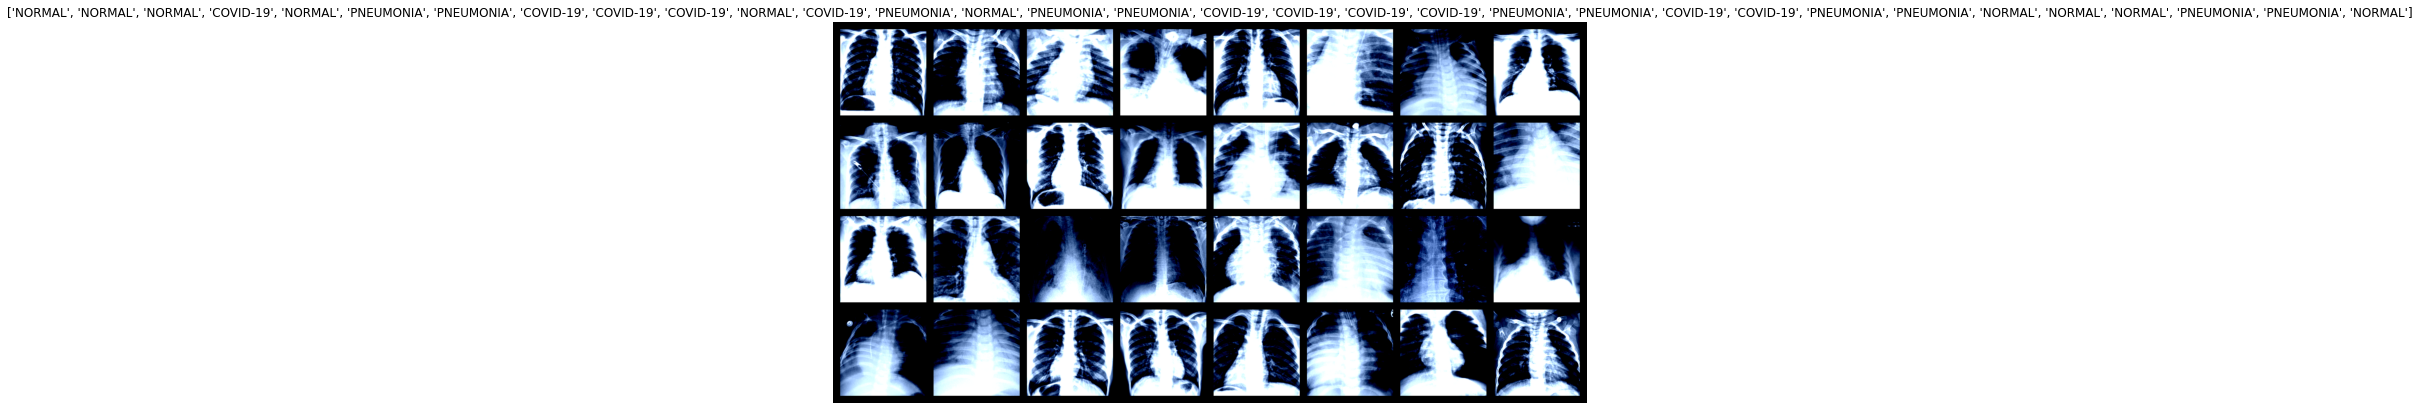

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


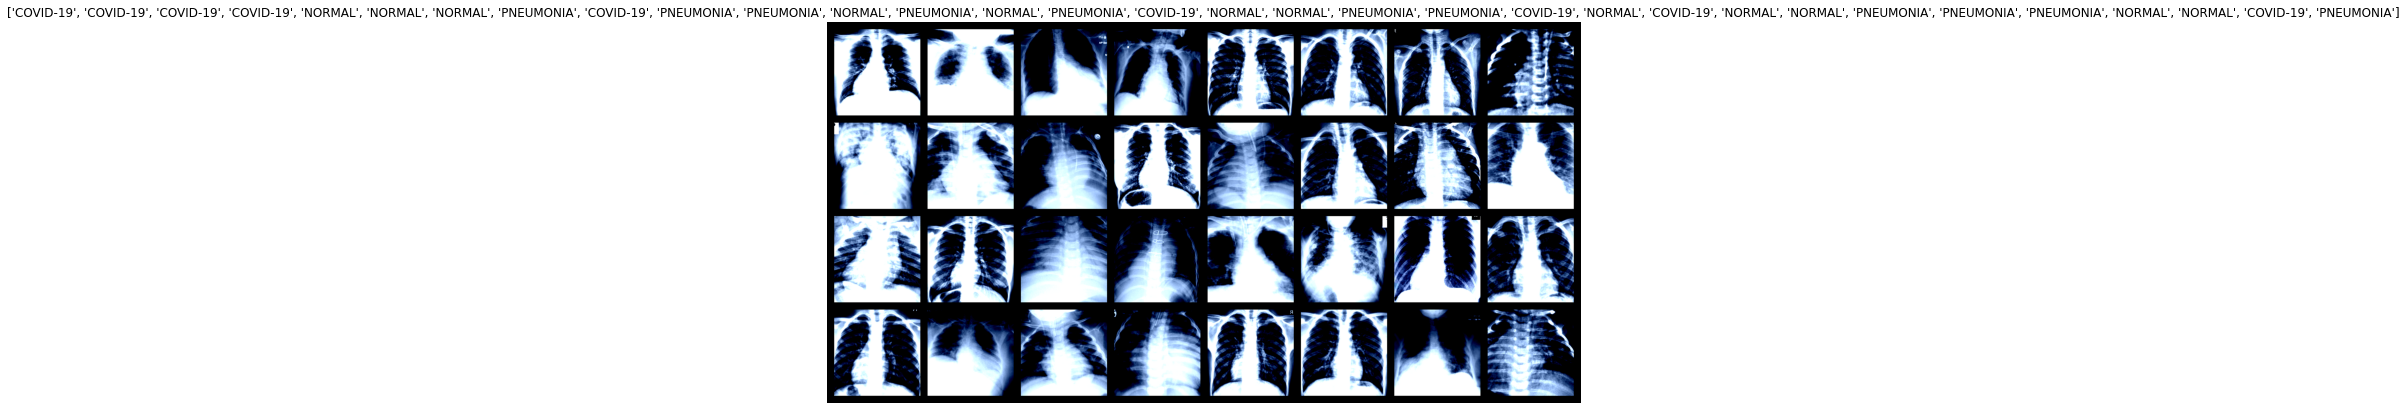

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


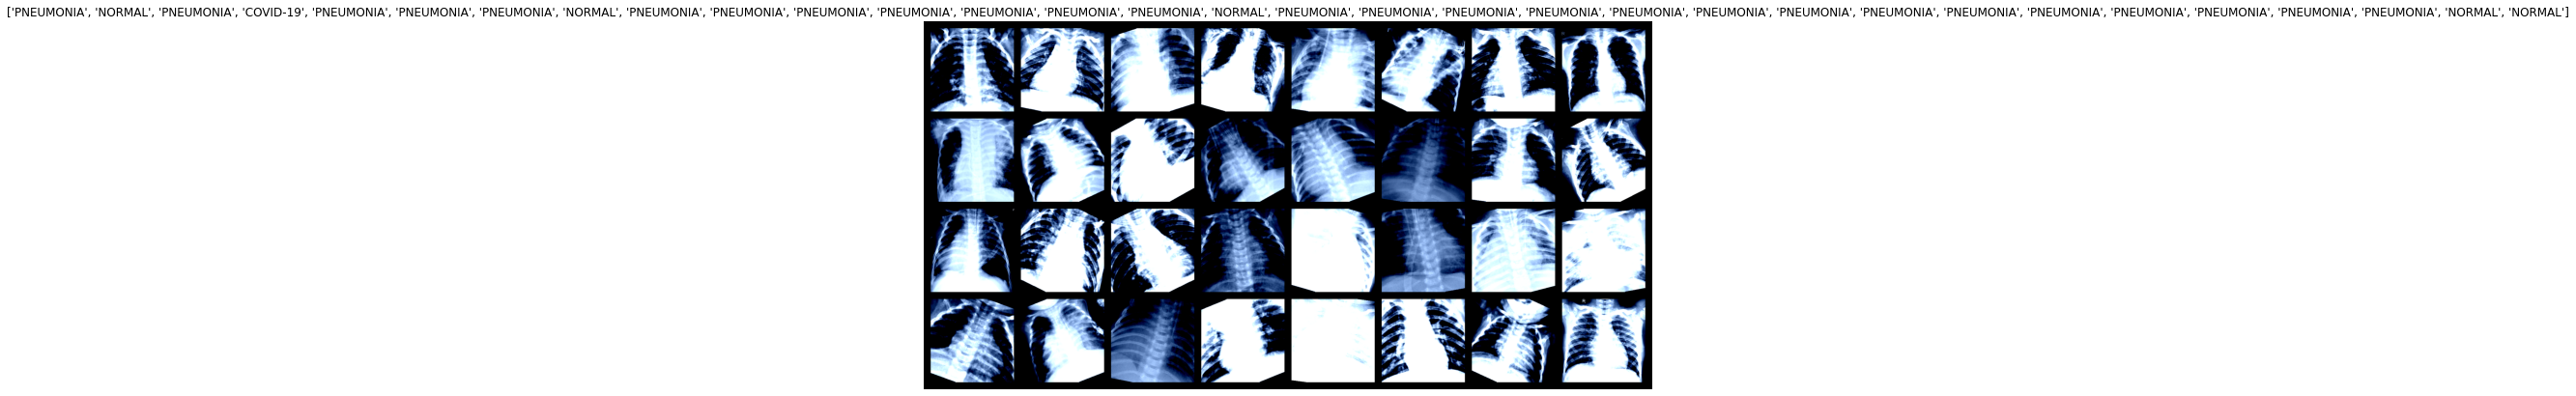

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


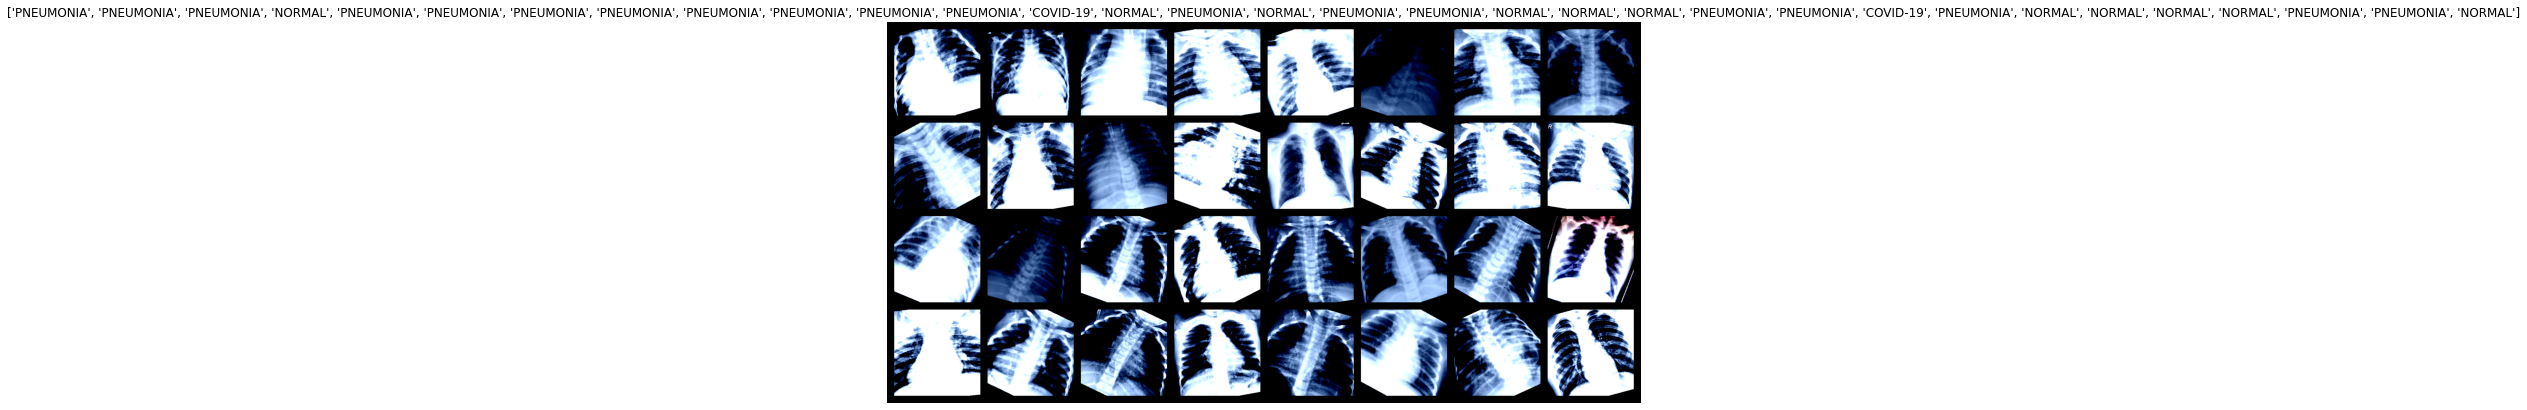

{'covid-19': 0, 'normal': 1, 'pnuemonia': 2}
torch.Size([32, 3, 299, 299])
torch.Size([32])
tensor([2, 1, 1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 0, 2, 1, 0, 0, 2, 0, 0, 2, 2,
        1, 0, 0, 2, 1, 1, 0, 2])
torch.Size([32, 3, 299, 299])
torch.Size([32])
tensor([0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 2, 2,
        2, 2, 1, 1, 1, 1, 2, 1])
torch.Size([32, 3, 299, 299])
torch.Size([32])
tensor([2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 2, 2, 0, 0,
        1, 1, 0, 2, 0, 2, 2, 0])
torch.Size([32, 3, 299, 299])
torch.Size([32])
tensor([1, 2, 1, 2, 0, 0, 1, 1, 1, 0, 0, 2, 2, 0, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1,
        2, 0, 0, 1, 1, 2, 2, 0])
torch.Size([21, 3, 299, 299])
torch.Size([21])
tensor([2, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0, 2, 1, 1, 0, 2, 0])


In [2]:
import os
import random
import numpy as np
import pandas as pd
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchvision import models


#Use the preprocess function from tb_preprocess.py to load the datasets
from tb_preprocess_incep import load_data

train_loader, _, val_loader,_ = load_data()  

print(train_loader)


dataiter = iter(train_loader)
images, labels = dataiter.next()
print(images.shape)
print(labels.shape)
print(labels)

for i, data in (train_loader):
    print(i.shape)
    print(data.shape)
    print(data)







Use the Inception V3 model that will is pretrained.


In [3]:
#alexnet = models.alexnet(pretrained=True)
inception_v3 = models.inception_v3(pretrained=True, aux_logits=False)

#Instantiating CUDA device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#Verifying CUDA
print(device)

#Move the input and AlexNet_model to GPU for speed if available
inception_v3.to(device)



cpu


Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

The standard Inception V3 model has 1000 out features for the last Linear layer.
Since the data set only has 3 classes, change the last layer to have 3 outs

In [4]:
#inception_v3.classifier[6] = torch.nn.Linear(alexnet.classifier[6].in_features, 3, bias=True)
inception_v3.fc = torch.nn.Linear(inception_v3.fc.in_features, 3, bias=True)
#inception_v3.AuxLogits.fc = torch.nn.Linear(inception_v3.AuxLogits.fc.in_features, 3, bias=True)

inception_v3.eval()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

#### Criterion and Optimizer

In [5]:
import torch.optim as optim

#Loss
criterion = nn.CrossEntropyLoss()

#Optimizer(SGD)
optimizer = optim.SGD(inception_v3.parameters(), lr=0.001, momentum=0.9)

### Training Inception V3

In [6]:
#Epochs is set to 1. Performace is slow
#Need to try CUDA to speed up

n_epochs = 2

def train_model(model, train_dataloader, n_epoch=n_epochs, optimizer=optimizer, criterion=criterion):
    import torch.optim as optim

    # prep model for training
    model.train() 
    
    for epoch in range(n_epoch):
        curr_epoch_loss = []
        for data, target in train_dataloader:
            
            optimizer.zero_grad()
            
            output = model(data)
            #(output, aux_output) = model(data)
            #print(output)
            
            loss = criterion(output, target)
            #loss1 = criterion(output, target)
            #loss2 = criterion(aux_output, target)
            #loss = loss1 + loss2
            
            loss.backward()
            optimizer.step()
            
            curr_epoch_loss.append(loss.cpu().data.numpy())
         
        #print(f"Epoch {epoch}:")
        print(f"Epoch {epoch}: curr_epoch_loss={np.mean(curr_epoch_loss)}")
    
    return model

inception_v3 = train_model(inception_v3, dataiter)

Epoch 0: curr_epoch_loss=1.1292260885238647
Epoch 1: curr_epoch_loss=nan


/home/redflannel/redflannel/redflannel/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/redflannel/redflannel/redflannel/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


#### Testing

In [7]:
def eval_model(model, dataloader):

    model.eval()
    Y_pred = []
    Y_test = []
    for data, target in dataloader:
        # your code here
        output = model(data)
        #print(output.data)
        #print(target)
        _, y_predicted = torch.max(output.data, 1)
        
      
        Y_pred = np.append(Y_pred,y_predicted.detach().numpy())
        Y_test = np.append(Y_test,target.detach().numpy())
        print('Prediction')
        print(Y_pred)
        #print('Test')
        #print(Y_test)
        
    #print(Y_pred)
    #Y_pred = np.concatenate(Y_pred, axis=0)
    #Y_test = np.concatenate(Y_test, axis=0)
    
    return Y_pred, Y_test

from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred, y_true = eval_model(inception_v3, train_loader)
acc = accuracy_score(y_true, y_pred)

print(("Validation Accuracy: " + str(acc)))

# Classification Report
print(classification_report(y_true, y_pred))

# Confusion Matrix
print(confusion_matrix(y_true, y_pred))

idx2class = {'covid-19': 0, 'normal': 1, 'pnuemonia': 2}
classes = ('Covid-19', 'Normal', 'Pneumonia')

#
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_true, y_pred)).rename(columns=idx2class, index=idx2class)

cm = confusion_matrix(y_true, y_pred)
print(cm)

cm_display = ConfusionMatrixDisplay(cm,classes).plot()






ModuleNotFoundError: No module named 'sklearn'

## Testing Accuracy

Classification accuracy of the test model.

In [ ]:

correct = 0
total = 0

# no_grad impacts the autograd engine and deactivate it. It will reduce memory usage and speed up computations
with torch.no_grad():
    for data in train_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = inception_v3(images)
        #print(outputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on test X-rays : %d %%' % ( 100 * correct / total))



## Individual Classes


In [ ]:
#Testing classification accuracy for individual classes.
class_correct = list(0. for i in range(3))
class_total = list(0. for i in range(3))

with torch.no_grad():
    for data in train_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = alexnet(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(3):
    print('Accuracy of %5s : %2d %%' % (
         classes[i], 100 * class_correct[i] / class_total[i]))
